<a href="https://colab.research.google.com/github/aletbm/MySolutions_MLZoomcamp2024_DataTalks.Club/blob/main/04_Evaluation_metrics_for_classification/4_Evaluation_metrics_for_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4th week's homework - by [Alexander Daniel Rios](https://linktr.ee/aletbm)

In [260]:
!wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip

--2024-10-21 03:27:25--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank+marketing.zip.8’

bank+marketing.zip.     [  <=>               ] 999.85K  2.46MB/s    in 0.4s    

2024-10-21 03:27:25 (2.46 MB/s) - ‘bank+marketing.zip.8’ saved [1023843]



In [261]:
!unzip -o bank+marketing.zip
!unzip -o bank-additional.zip
!unzip -o bank.zip

Archive:  bank+marketing.zip
 extracting: bank.zip                
 extracting: bank-additional.zip     
Archive:  bank-additional.zip
  inflating: bank-additional/.DS_Store  
  inflating: __MACOSX/bank-additional/._.DS_Store  
  inflating: bank-additional/.Rhistory  
  inflating: bank-additional/bank-additional-full.csv  
  inflating: bank-additional/bank-additional-names.txt  
  inflating: bank-additional/bank-additional.csv  
  inflating: __MACOSX/._bank-additional  
Archive:  bank.zip
  inflating: bank-full.csv           
  inflating: bank-names.txt          
  inflating: bank.csv                


In [262]:
!pip install mplcyberpunk

In [263]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import matplotlib.pyplot as plt
import mplcyberpunk

plt.style.use('cyberpunk')

In [264]:
df = pd.read_csv("bank-full.csv", delimiter=';')
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Dataset preparation
For the rest of the homework, you'll need to use only these columns:

+ age,
+ job,
+ marital,
+ education,
+ balance,
+ housing,
+ contact,
+ day,
+ month,
+ duration,
+ campaign,
+ pdays,
+ previous,
+ poutcome,
+ y

In this dataset the target variable is `y` variable - has the client subscribed a term deposit or not.

Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`

In [265]:
df = df.loc[:, ~df.columns.isin(['default', 'loan'])].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   contact    45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


In [266]:
df_train_full, df_val = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_test = train_test_split(df_train_full, test_size=0.25, random_state=1)

# Question 1: ROC AUC feature importance
ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

+ For each numerical variable, use it as score (aka prediction) and compute the AUC with the `y` variable as ground truth.
+ Use the training dataset for that
If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['engine_hp']`)

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

+ `balance`
+ `day`
+ `duration`
+ `previous`

In [267]:
for col in ['balance', 'day', 'duration', 'previous']:
    auc = roc_auc_score(df_train.y, df_train[col])
    print(f"Variable:{col} --> auc = {auc if auc >= 0.5 else roc_auc_score(df_train.y, -df_train[col])}")

Variable:balance --> auc = 0.5888313805382317
Variable:day --> auc = 0.525957882383908
Variable:duration --> auc = 0.8147002759670778
Variable:previous --> auc = 0.5985653242764153


# Question 2: Training the model
Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:
```
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```
What's the AUC of this model on the validation dataset? (round to 2 digits)
+ 0.69
+ 0.79
+ 0.89
+ 0.99

## One-hot-encoding

In [268]:
X_train_full, y_train_full = df_train_full.drop(['y'], axis=1).copy(), df_train_full['y'].copy()
X_train, y_train = df_train.drop(['y'], axis=1).copy(), df_train['y'].copy()
X_val, y_val = df_val.drop(['y'], axis=1).copy(), df_val['y'].copy()
X_test, y_test = df_test.drop(['y'], axis=1).copy(), df_test['y'].copy()

train_full_dicts = X_train_full.to_dict(orient='records')
train_dicts = X_train.to_dict(orient='records')
val_dicts = X_val.to_dict(orient='records')
test_dicts = X_test.to_dict(orient='records')

dv = DictVectorizer(sparse=False).set_output(transform='pandas').fit(train_dicts)

X_train_full = dv.transform(train_full_dicts)
X_train = dv.transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

X_train.head(5)

,age,balance,campaign,contact=cellular,contact=telephone,contact=unknown,day,duration,education=primary,education=secondary,...,month=may,month=nov,month=oct,month=sep,pdays,poutcome=failure,poutcome=other,poutcome=success,poutcome=unknown,previous
0,56.0,40.0,2.0,1.0,0.0,0.0,11.0,123.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0
1,33.0,4790.0,1.0,1.0,0.0,0.0,20.0,137.0,0.0,1.0,...,0.0,0.0,0.0,0.0,272.0,1.0,0.0,0.0,0.0,2.0
2,32.0,392.0,2.0,1.0,0.0,0.0,21.0,148.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0
3,40.0,2129.0,1.0,1.0,0.0,0.0,30.0,452.0,0.0,1.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0
4,54.0,1180.0,2.0,1.0,0.0,0.0,19.0,394.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0


In [269]:
y_train_full = y_train_full.map({"no":0, "yes":1}).astype('int')
y_train = y_train.map({"no":0, "yes":1}).astype('int')
y_val = y_val.map({"no":0, "yes":1}).astype('int')
y_test = y_test.map({"no":0, "yes":1}).astype('int')

In [273]:
lr = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000).fit(X_train, y_train)
y_pred_val = lr.predict_proba(X_val)[:, 1]
round(roc_auc_score(y_val, y_pred_val), 2)

0.91

# Question 3: Precision and Recall
Now let's compute precision and recall for our model.

+ Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
+ For each threshold, compute precision and recall
+ Plot them

At which threshold precision and recall curves intersect?
+ 0.265
+ 0.465
+ 0.665
+ 0.865

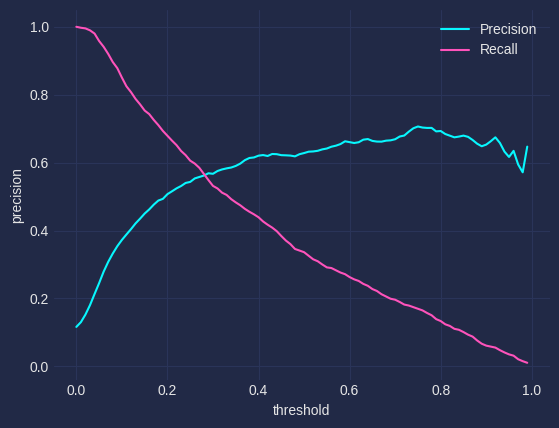

In [274]:
scores = []

for t in np.arange(0, 1, 0.01):
    predictions_true = y_pred_val >= t
    predictions_false = y_pred_val < t
    actual_true = y_val == 1
    actual_false = y_val == 0

    TN = (predictions_false & actual_false).sum()
    FP = (predictions_true & actual_false).sum()
    FN = (predictions_false & actual_true).sum()
    TP = (predictions_true & actual_true).sum()
    confusion_table = np.array([[TN, FP],
                                [FN, TP]])

    precision = TP / (TP+FP)
    recall = TP / (TP+FN)

    scores.append([t, precision, recall])

df_scores = pd.DataFrame(data=scores, columns=["threshold", "precision", "recall"])
sns.lineplot(df_scores, x="threshold", y="precision", label="Precision")
sns.lineplot(df_scores, x="threshold", y="recall", label="Recall")
plt.legend()

In [275]:
df_scores.iloc[np.argmin(np.abs(df_scores.precision - df_scores.recall))]

,28
threshold,0.280000
precision,0.561851
recall,0.566667


# Question 4: F1 score
Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$F_1 = 2\frac{P.R}{P+R}$


Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?
+ 0.02
+ 0.22
+ 0.42
+ 0.62

In [276]:
df_scores["f1"] = 2*(df_scores.precision * df_scores.recall) / (df_scores.precision + df_scores.recall)
df_scores[df_scores.f1 == df_scores.f1.max()]

,threshold,precision,recall,f1
22,0.22,0.524138,0.651429,0.580892


<Axes: xlabel='threshold', ylabel='f1'>

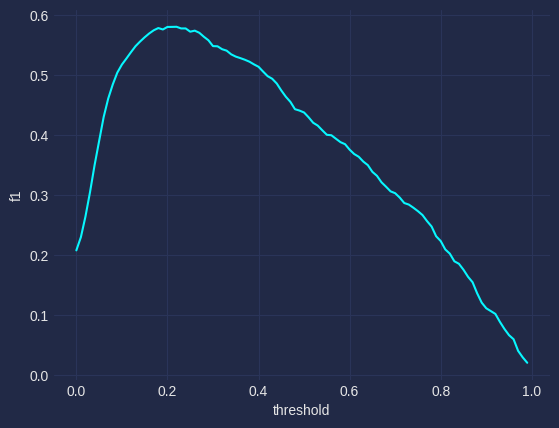

In [277]:
sns.lineplot(df_scores, x="threshold", y="f1")

# Question 5: 5-Fold CV
Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:
```
KFold(n_splits=5, shuffle=True, random_state=1)
```
+ Iterate over different folds of `df_full_train`
+ Split the data into train and validation
+ Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
+ Use AUC to evaluate the model on validation

How large is standard deviation of the scores across different folds?

+ 0.0001
+ 0.006
+ 0.06
+ 0.26

In [279]:
def train(X, y):
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X, y)
    return model

def predict(X, model):
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred

kfold = KFold(n_splits=5, shuffle=True, random_state=1)
aucs = []

for train_idx, val_idx in kfold.split(X_train_full, y_train_full):
    train_X = X_train_full.iloc[train_idx]
    val_X = X_train_full.iloc[val_idx]

    train_y = y_train_full.iloc[train_idx]
    val_y = y_train_full.iloc[val_idx]

    model = train(train_X, train_y)
    y_pred_val = predict(val_X, model)

    auc = roc_auc_score(val_y, y_pred_val)
    aucs.append(auc)

print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs)))

auc = 0.906 ± 0.006


# Question 6: Hyperparameter Tuning
Now let's use 5-Fold cross-validation to find the best parameter `C`.

+ Iterate over the following `C` values: `[0.000001, 0.001, 1]`
+ Initialize `KFold` with the same parameters as previously
+ Use these parameters for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
+ Compute the `mean` score as well as the `std` (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

+ 0.000001
+ 0.001
+ 1

If you have ties, select the score with the lowest std. If you still have ties, select the smallest `C`.

In [281]:
def train(X, y, C):
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X, y)
    return model

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in [0.000001, 0.001, 1]:
    aucs = []

    for train_idx, val_idx in kfold.split(X_train_full, y_train_full):
        train_X = X_train_full.iloc[train_idx]
        val_X = X_train_full.iloc[val_idx]

        train_y = y_train_full.iloc[train_idx]
        val_y = y_train_full.iloc[val_idx]

        model = train(train_X, train_y, C=C)
        y_pred_val = predict(val_X, model)

        auc = roc_auc_score(val_y, y_pred_val)
        aucs.append(auc)
    print('C=%s, auc = %0.3f ± %0.3f' % (C, np.mean(aucs), np.std(aucs)))

C=1e-06, auc = 0.701 ± 0.009
C=0.001, auc = 0.861 ± 0.007
C=1, auc = 0.906 ± 0.006
